In [1]:
#import libraries 
import matplotlib.pyplot as plt
import numpy as np

import skimage.io
from skimage.color import rgb2hsv
from skimage.exposure import equalize_adapthist

import cv2

import os

from rembg.bg import remove
import io
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# print(os.listdir("rice_leaf_diseases"))


In [2]:
import onnxruntime as ort
print(ort.get_device())
# model_path = '<path to model>'

# providers = [
#     ('CUDAExecutionProvider', {
#         'device_id': 0,
#         'arena_extend_strategy': 'kNextPowerOfTwo',
#         'gpu_mem_limit': 2 * 1024 * 1024 * 1024,
#         'cudnn_conv_algo_search': 'EXHAUSTIVE',
#         'do_copy_in_default_stream': True,
#     }),
#     'CPUExecutionProvider',
# ]

# session = ort.InferenceSession(model_path, providers=providers)

GPU


In [3]:
#path folder penyakit
ori_blb_path = "rice_leaf_diseases/train/bacterial_leaf_blight/"
ori_bs_path = "rice_leaf_diseases/train/brown_spot/"
ori_ls_path = "rice_leaf_diseases/train/leaf_smut/"

# path setelah color balanced
blb_cb = "rld_img_cb/blb/"
bs_cb = "rld_img_cb/bs/"
ls_cb = "rld_img_cb/ls/"

# path setelah rembg
r_blb_path = "rld_img_rembg/blb/"
r_bs_path = "rld_img_rembg/bs/"
r_ls_path = "rld_img_rembg/ls/"

In [4]:
import colorcorrect.algorithm as cca
from colorcorrect.util import from_pil, to_pil

img_test = Image.open(ori_blb_path + '/' + "DSC_0365.JPG")
# to_pil(cca.max_white(from_pil(img_test))).show()

def colorBalance(image, name, path):
    """
    Implement cca.max_white color correction algorithm 
      using colorcorrect library
    Args:
        image: image object that will be color balanced
        name: filename of the saved color balanced image
        path: color balanced image destination folder
    Returns: 
    """

    to_pil(cca.max_white(from_pil(image))).save(path + name)


# colorBalance(img_test, "DSC_0365.JPG", r_blb_cb)


In [5]:
# # image color balancing
# blb_os_path = os.listdir(ori_blb_path)
# for img_name in blb_os_path[:]:
#     read_img = Image.open(ori_blb_path + img_name)
#     colorBalance(read_img, img_name, blb_cb)

# bs_os_path = os.listdir(ori_bs_path)
# for img_name in bs_os_path[:]:
#     read_img = Image.open(ori_bs_path + img_name)
#     colorBalance(read_img, img_name, bs_cb)

# ls_os_path = os.listdir(ori_ls_path)
# for img_name in ls_os_path[:]:
#     read_img = Image.open(ori_ls_path + img_name)
#     colorBalance(read_img, img_name, ls_cb)

In [6]:
def preprocessedImage(img_path, rmv_bg_img_path):
    """
    Remove background from image using rembg library
    Args:
        img_path: path of the image folder directory in string
        rmv_bg_img_path: destination of removed background path
    Returns: 
    """
    os_path = os.listdir(img_path)
    for img_name in os_path[:]:
        read_img = cv2.imread(img_path + img_name) #read image from path

        r_bg_img = remove(read_img)

        # final_img = cv2.cvtColor(r_bg_img, cv2.COLOR_RGB2BGR)


        cv2.imwrite(rmv_bg_img_path + img_name, r_bg_img)

        
#function display all images
def displayImg(array):
    """
    Display all images from an array
    Args:
        array: array that contains image data type
    Returns: Image displayed using matlotlib
    """
    n = len(array)
    # f = plt.figure()
    for i in range(n):
        plt.figure()
        plt.imshow(array[i])
        plt.show(block = True)


In [7]:
# preprocessedImage(ori_blb_path, r_blb_path)
# preprocessedImage(ori_bs_path, r_bs_path)
# preprocessedImage(ori_ls_path, r_ls_path)

In [8]:
# def getRGB(event,x,y,flags,param): #(Based from stackoverflow by Wicaledon to get RGB color values from clicked pixel of an image)
#     if event == cv2.EVENT_LBUTTONDOWN: #checks mouse left button down condition
#         colorsR = image[y,x,2]
#         colorsG = image[y,x,1]
#         colorsB = image[y,x,0]
#         colors = image[y,x]
#         print("RGB Format: ",colors)
#         print("Pixel Coordinates: X: ",x,"Y: ",y)

# image = cv2.imread("rice_leaf_diseases/bacterial_leaf_blight/DSC_0365.jpg")
# cv2.namedWindow('getRGB')
# cv2.setMouseCallback('getRGB',getRGB)

# #Do until esc pressed
# while(1):
#     cv2.imshow('getRGB',image)
#     if cv2.waitKey(20) & 0xFF == 27:
#         break
# #if esc pressed, finish.
# cv2.destroyAllWindows()

Text(0.5, 1.0, 'Value')

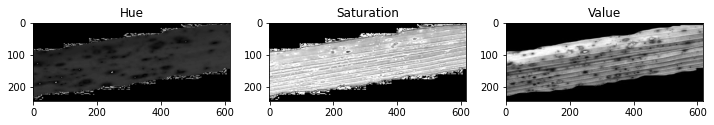

In [16]:
x = cv2.imread("rld_img_rembg/bs/DSC_0101.jpg") #read image from path
x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB) #convert image color to RGB
leaf_disease_hsv = rgb2hsv(x) #convert RGB image to HSV (Based on from https://mattmaulion.medium.com/color-image-segmentation-image-processing-4a04eca25c0 by Matt Maulion)

fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(leaf_disease_hsv[:,:,0], cmap='gray')
ax[0].set_title('Hue')
ax[1].imshow(leaf_disease_hsv[:,:,1], cmap='gray')
ax[1].set_title('Saturation')
ax[2].imshow(leaf_disease_hsv[:,:,2], cmap='gray')
ax[2].set_title('Value')


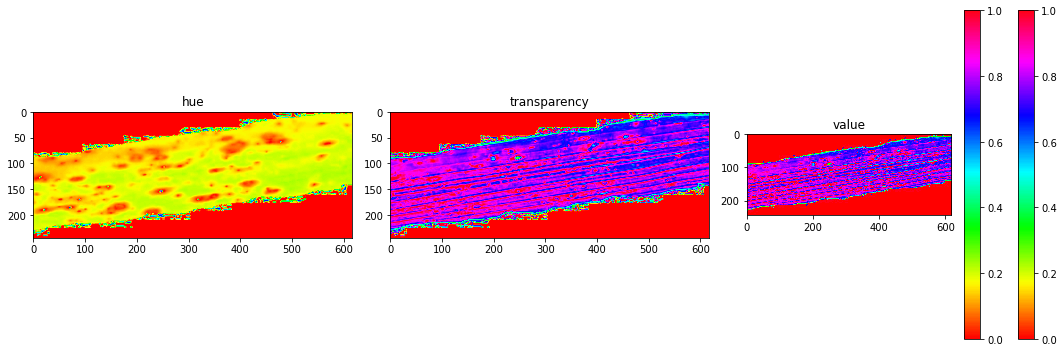

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(leaf_disease_hsv[:,:,0],cmap='hsv')
ax[0].set_title('hue')
ax[1].imshow(leaf_disease_hsv[:,:,1],cmap='hsv')
ax[1].set_title('transparency')
ax[2].imshow(leaf_disease_hsv[:,:,2],cmap='hsv')
ax[2].set_title('value')
fig.colorbar(skimage.io.imshow(leaf_disease_hsv[:,:,0],cmap='hsv')) 
fig.colorbar(skimage.io.imshow(leaf_disease_hsv[:,:,1],cmap='hsv')) 
# fig.colorbar(imshow(leaf_disease_hsv[:,:,2],cmap='hsv')) 

fig.tight_layout()


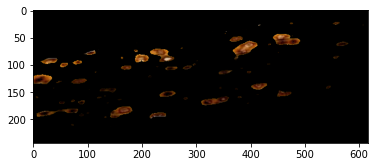

In [18]:
#lower hue 
lower_hue_mask = leaf_disease_hsv[:,:,0] > 0.0
#upper hue
upper_hue_mask = leaf_disease_hsv[:,:,0] < 0.1
#transparensi
lower_saturation_mask = leaf_disease_hsv[:,:,1] > 0.5
upper_saturation_mask = leaf_disease_hsv[:,:,1] < 0.8

 
mask_segment = upper_hue_mask*lower_hue_mask
red = x[:,:,0]*mask_segment
green = x[:,:,1]*mask_segment
blue = x[:,:,2]*mask_segment
bags_masked = np.dstack((red,green,blue))
plt.imshow(bags_masked)


In [12]:
# path mask
m_blb_path = "rld_mask/blb/"
m_bs_path = "rld_mask/bs/"
m_ls_path = "rld_mask/ls/"


def create_hue_segment(path_r, path_m, lower_hue_val, upper_hue_val):
    """
    Create mask of images from path_r and save them to 
        path_m using hue segmentation
    Args:
        path_r: path of the image folder directory in string
        path_m: path of the mask image destination
        lower_hue_val: lowest hue value
        upper_hue_val: highest hue value
    Returns: 
    """
    os_path = os.listdir(path_r)
    for img in os_path[:]:
        read_bgr_img = cv2.imread(path_r + img)
        read_rgb_img = cv2.cvtColor(read_bgr_img, cv2.COLOR_BGR2RGB)
        read_hsv_img = rgb2hsv(read_rgb_img)
        
        # Hue segment
        img_hue = read_hsv_img[:,:,0]
        l_mask = img_hue > lower_hue_val
        u_mask = img_hue < upper_hue_val
        hue_mask = u_mask * l_mask

        red = read_rgb_img[:,:,0] * hue_mask
        green = read_rgb_img[:,:,1] * hue_mask
        blue = read_rgb_img[:,:,2] * hue_mask

        mask = np.dstack((red, green, blue))
        plt.imsave(path_m + img, mask) #use colormap
        # plt.figure()
        # plt.imshow(read_hsv_img)

        # plt.figure()
        # plt.imshow(read_rgb_img)

        # plt.figure()
        # plt.imshow(mask, cmap=str("gray"))
        

def create_hue_mask_alt(path1, path2, non_target_hue, target_hue):
    """
    Create mask of images from path1 and save them to 
        path2y
    Args:
        path: path of the image folder directory in string
        path2: path of the mask image destination
        non-target-hue: hue value to be removed
        target-hue: targeted hue value 
    Returns: 
    """
    os_path = os.listdir(path1)
    for img in os_path[:]:
        read_img = np.array(Image.open(path1 + img))

        # Hue segment
        img_hue = read_img[:,:,0]
        markers = np.zeros_like(img_hue)
        if non_target_hue != None:
            markers[img_hue < non_target_hue] = 1
        if target_hue != None:
            markers[img_hue > target_hue] = 2
        cmapps = ["gray"]

        for i in range(len(cmapps)):
            plt.imsave(path2 + "/" + img, markers, cmap=str(cmapps[i])) #use colormap


def create_adp_mask(path1, path2, adp_type,  thres_type):
    """
    Create mask of images from path1 and save them to 
        path2y
    Args:
        path: path of the image folder directory in string
        path2: path of the mask image destination
        adp_type: adaptive method 
        thres_type: threshold type
    Returns: 
    """
    os_path = os.listdir(path1)
    for img in os_path[:]:
        read_img = np.array(Image.open(path1 + "/" + img))


        # adapthist thresholding
        img_gray = cv2.cvtColor(read_img, cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit=5)
        clahe_img = clahe.apply(img_gray)
        threshG = cv2.adaptiveThreshold(clahe_img, 255, adp_type, thres_type, 199, 18)

        cv2.imwrite(path2 + "/" + img, threshG)

In [19]:
# create_hue_segment(r_blb_path, m_blb_path, 0.05, 0.15)
# create_hue_segment(r_bs_path, m_bs_path, 0.00, 0.1)
# create_hue_segment(r_ls_path, m_ls_path, 0.00, 0.1)

# create_adp_mask(r_bs_path, m_bs_path, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV)
# create_adp_mask(r_ls_path, m_ls_path, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV)


In [ ]:
# path segment img
seg_blb_path = "segment_img/blb"
seg_bs_path = "segment_img/bs"
seg_ls_path = "segment_img/ls"

def segment_disease(path_r, path_m, path_res):
    """
    Segment disease from the paddy leaf
    Args:
        path_r: path of the removed background image
        path_m: path of the mask image 
        path_res: destination path of segment image
    Returns: 
    """
    os_path = os.listdir(path_r)
    for img in os_path[:]:
        r_img = cv2.imread(path_r + "/" + img)
        r_img = cv2.cvtColor(r_img, cv2.COLOR_BGR2RGB)

        m_img = cv2.imread(path_m + "/" + img)

        res = cv2.bitwise_and(r_img, m_img)
        cv2.imwrite(path_res + "/" + img, res)

    


In [ ]:
# segment_disease(r_blb_path, m_blb_path, seg_blb_path)
# segment_disease(r_bs_path, m_bs_path, seg_bs_path)
segment_disease(r_ls_path, m_ls_path, seg_ls_path)

In [ ]:
import torch 
from torchvision import datasets, transforms, models

In [ ]:
data_dir = "rice_leaf_diseases/"

train_data = datasets.ImageFolder(data_dir + '/train')
val_data = datasets.ImageFolder(data_dir + '/validation')

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data,)

dataiter = iter(train_data)
images, clases = dataiter.__next__()
print(type(images))


<class 'PIL.Image.Image'>


In [ ]:
train_transforms = transforms.Compose([transforms.ToTensor()])
val_transforms = transforms.Compose([transforms.ToTensor(),])
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
val_data = datasets.ImageFolder(data_dir + '/validation', transform=val_transforms)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=8, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=8)

In [ ]:
train_transforms = transforms.Compose([transforms.ToTensor()])
val_transforms = transforms.Compose([transforms.ToTensor(),])
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
val_data = datasets.ImageFolder(data_dir + '/validation', transform=val_transforms)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=8, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=8)

In [ ]:
import torch.nn as nn
import numpy as np
class CropDetectCNN(nn.Module):
    # initialize the class and the parameters
    def __init__(self):
        super(CropDetectCNN, self).__init__()
        
        # convolutional layer 1 & max pool layer 1
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3),
            nn.MaxPool2d(kernel_size=2))
        
        # convolutional layer 2 & max pool layer 2
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1, stride=2),
            nn.MaxPool2d(kernel_size=2))
        
        #Fully connected layer
        self.fc = nn.Linear(32*28*28, 39)
         
    # Feed forward the network
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out
model = CropDetectCNN()
print(model)

CropDetectCNN(
  (layer1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=25088, out_features=39, bias=True)
)


In [ ]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [ ]:
# run on GPU if available else run on a CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
epochs = 1 # run more iterations
for epoch in range(epochs):
    running_loss = 0
    for images, classes in train_loader:
        # To device - to transfrom the image and classes to CPU|GPU
        images, classes = images.to(device), classes.to(device)
        
        # clears old gradients from the last step
        optimizer.zero_grad()
        
        # train the images
        outputs = model(images)
        
        #calculate the loss given the outputs and the classes
        loss = criterion(outputs, classes)
        
        # compute the loss of every parameter
        loss.backward()
        
        # apply the optimizer and its parameters
        optimizer.step()
        
        #update the loss
        running_loss += loss.item()
        
    else:
        validation_loss = 0
        accuracy = 0
        
        # to make the model run faster we are using the gradients on the train
        with torch.no_grad():
            # specify that this is validation and not training
            model.eval()
            for images, classes in val_loader:          
                # Use GPU
                images, classes = images.to(device), classes.to(device)
                
                # validate the images
                outputs = model(images)
                
                # compute validation loss
                loss = criterion(outputs, classes)
                
                #update loss
                validation_loss += loss.item()
                
                # get the exponential of the outputs
                ps = torch.exp(outputs)
                
                #Returns the k largest elements of the given input tensor along a given dimension.
                top_p, top_class = ps.topk(1, dim=1)
                
                # reshape the tensor
                equals = top_class == classes.view(*top_class.shape)
                
                # calculate the accuracy.
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        # change the mode to train for the next epochs
        model.train()
        print("Epoch: {}/{}.. ".format(epoch+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
              "Valid Loss: {:.3f}.. ".format(validation_loss/len(val_loader)),
              "Valid Accuracy: {:.3f}".format(accuracy/len(val_loader)))

RuntimeError: stack expects each tensor to be equal size, but got [3, 897, 3081] at entry 0 and [3, 216, 537] at entry 1

In [ ]:
import pandas as pd

data = {'name':['burger', 'milk', 'burger', 'coffee', 'noodles'], 'type':['meal', 'drink', 'meal', 'drink', 'meal'], 'id':[10, 7.5, 10, 9, 12.5]}
df = pd.DataFrame(data)

df.duplicated(keep='last')

0     True
1    False
2    False
3    False
4    False
dtype: bool